In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn-v0_8')
import warnings
warnings.filterwarnings('ignore')

First i stated with importing the libraries that i will be using for this project. 

I will be using pandas to read the data and numpy to do some calculations. 

I will also be using matplotlib and seaborn to do some visualizations.

In [2]:
df = pd.read_csv('Fish.csv')

Then i read the data using the pandas `read_csv` function and stored it in a variable called df.

In [3]:
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
64,Parkki,120.0,17.5,19.0,21.3,8.3922,2.9181
30,Bream,920.0,35.0,38.5,44.1,18.0369,6.3063
87,Perch,120.0,20.0,22.0,23.5,5.6400,3.5250
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
137,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960
11,Bream,500.0,28.7,31.0,36.2,14.3714,4.8146
60,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
101,Perch,218.0,25.0,26.5,28.0,7.1680,4.1440
17,Bream,700.0,30.4,33.0,38.5,14.9380,5.1975


The i got a sample of 10 rows 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


I then used the `info()` function to get some information about the data.

Got some info about the dataset and looks like there is no missing values but the column's names need to be changed to make them more clear

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


I then used the `describe()` function to get some statistics about the data with the `.T` to transpose the data to make it more readable.

I noticed that the minimum weight is 0 which can't be true so i'm going to investigate more but first i will set it to NaN

In [6]:
df.loc[df['Weight'] == 0, 'Weight'] = np.nan

I used the `df.loc` function to get the rows where the weight is 0 and set it to NaN

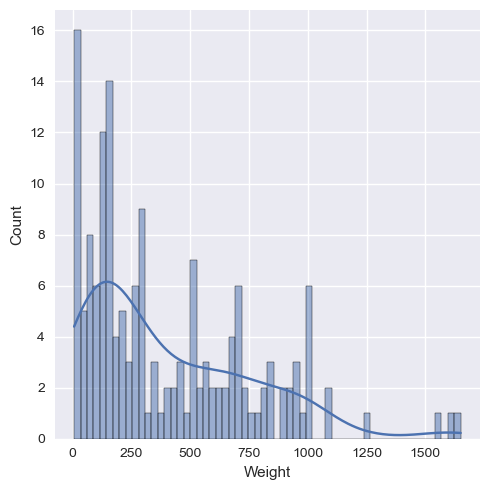

In [7]:
sns.displot(x = df['Weight'], data = df, bins = 60 , kde = True)

After visualizing the data i noticed that the weight ccolumn is skewed to the 0 side so i will do some investigation to see if i can find the reason for that.

First let's get the rows where the weight is less or equal to 50 grams and store them in variable called `bad_values`

In [8]:
bad_values = df['Weight'] <= 50 

Now let's return the rows where the weight is less or equal to 50 grams

In [9]:
df.loc[bad_values]

,Species,Weight,Length1,Length2,Length3,Height,Width
35,Roach,40.0,12.9,14.1,16.2,4.1472,2.2680
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
148,Smelt,9.7,10.4,11.0,12.0,2.1960,1.3800
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852


In [10]:
df['Weight'].describe().T

count     158.000000
mean      400.847468
std       357.697796
min         5.900000
25%       121.250000
50%       281.500000
75%       650.000000
max      1650.000000
Name: Weight, dtype: float64

Now this looks interestind because the weight values are small but they tend to correspond to the same values in the other columns so i will visualize the data to see if i can find something .

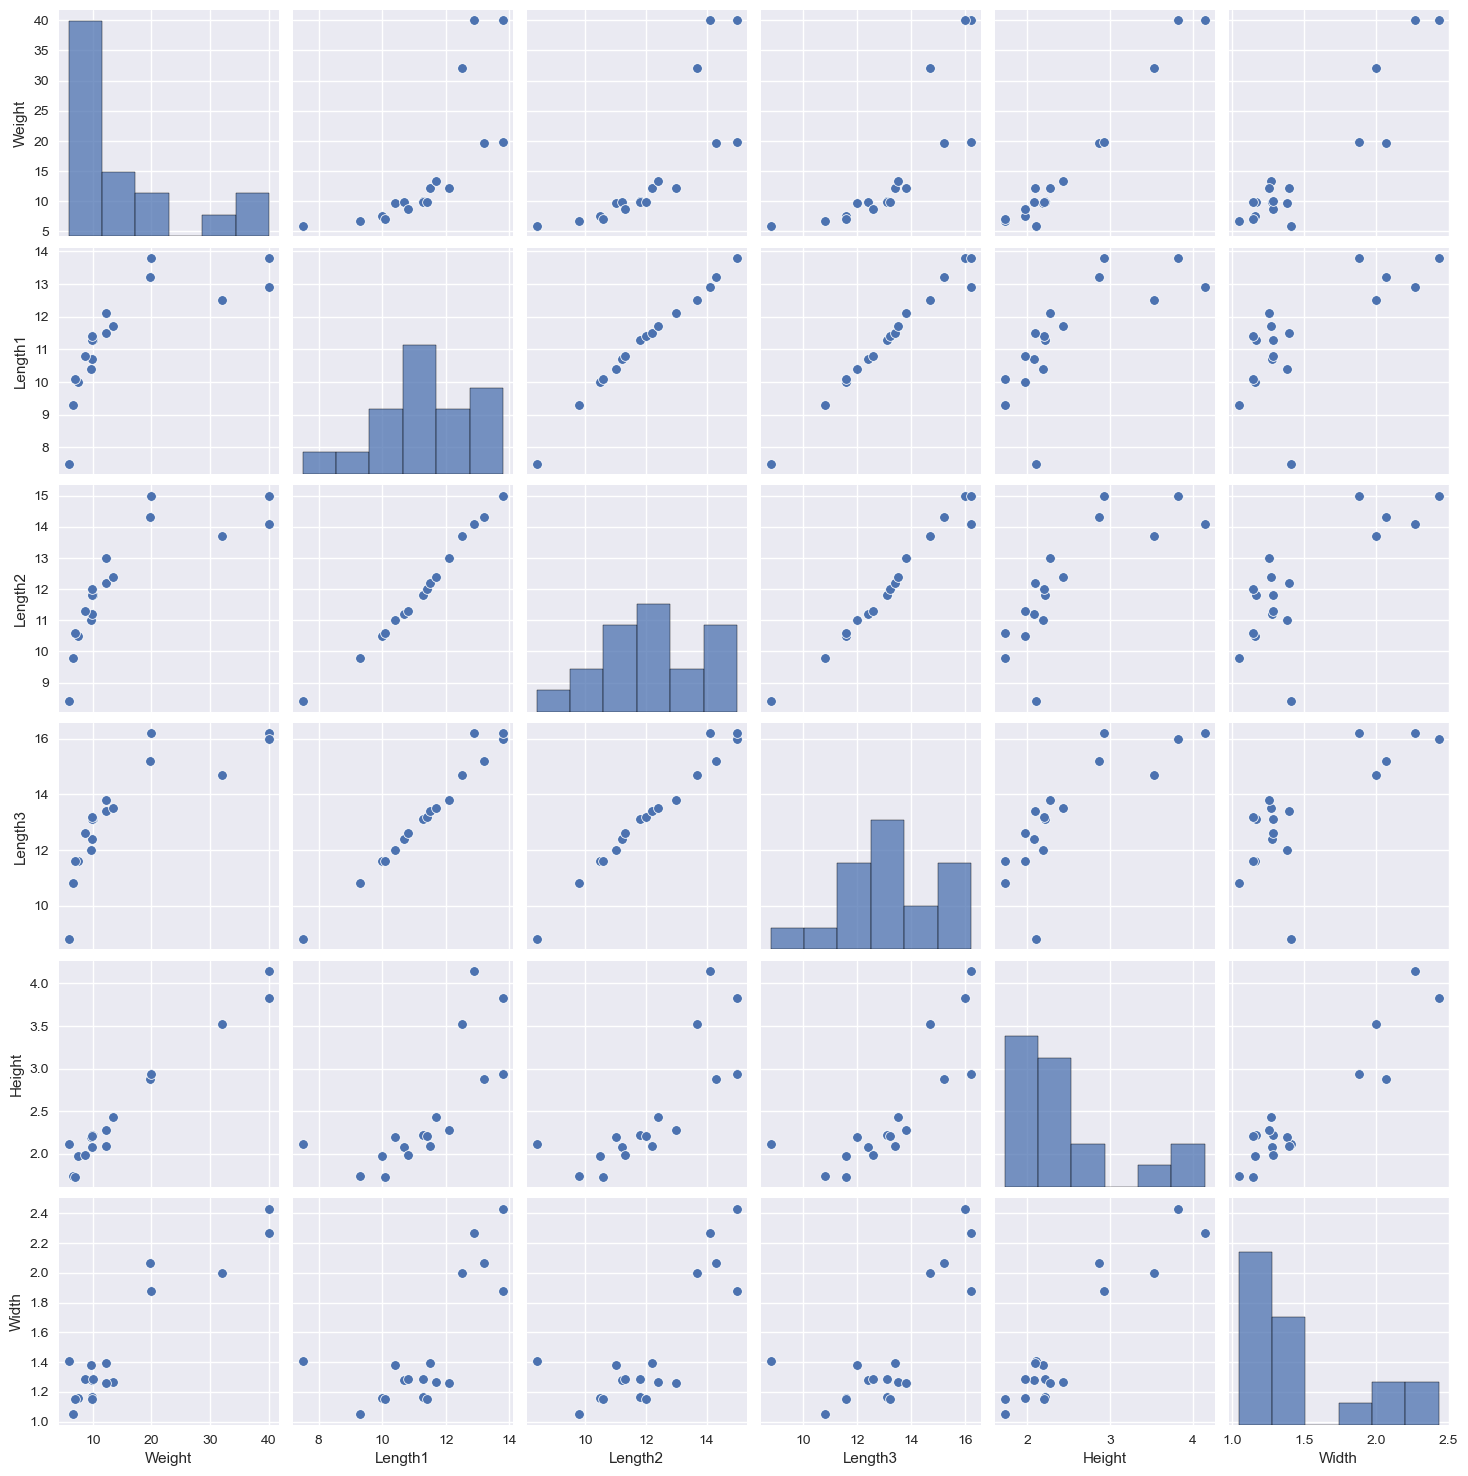

In [11]:
sns.pairplot(data = df.loc[bad_values])

And as I mentioned, there is a correlation between the weight and the other columns so i will do some research about the `Roacch` and `Smelt` fish to see if they are small fish and if they are then i will keep the data as it is but if they are not then i will drop the rows where the weight is less than 50 grams.

After doing some search i found out that :
- smelt fish avg weight is 2.5 ounces but can start from less than 1 ounce which makes these values reasonable so i won't change them 
- roach fish avg weight is 450 grams so i'll replace the values less than 50 grams with the NaN value
- perch fish avg weight is 2.5 kilograms but these values also will be handeled as outliers later in the notebook


In [12]:
df.loc[df['Weight'] <= 50 & (df['Species'] == 'Roach'), 'Weight'] = np.nan

## Cleaning

In [13]:
df.columns=['species','weight','length_ver','length_diag','length_cross','height','width_dig']

First I started by changing the names of the columns 

In [14]:
df.duplicated().sum()

0

Then i used the `df.duplicated()` function to see if there were any duplicated rows and there were not any duplicates.

In [15]:
df.isnull().sum()

species         0
weight          1
length_ver      0
length_diag     0
length_cross    0
height          0
width_dig       0
dtype: int64

Then i used the `df.isnull().sum()` to see the number of missing values in each column and :
- The `Weight` column has 1 missing values

So i'll replace the missing values with the maean of each species

In [16]:
weight_description = df.groupby('species').describe().T
weight_description.loc['weight']

species,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
count,35.000000,11.000000,56.000000,17.000000,19.000000,14.000000,6.000000
mean,617.828571,154.818182,382.239286,718.705882,160.052632,11.178571,531.000000
std,209.205709,78.755086,347.617717,494.140765,83.528088,4.131526,309.602972
min,242.000000,55.000000,5.900000,200.000000,40.000000,6.700000,270.000000
25%,462.500000,105.000000,120.000000,345.000000,115.000000,8.950000,279.000000
50%,610.000000,145.000000,207.500000,510.000000,150.000000,9.850000,423.000000
75%,717.000000,185.000000,692.500000,950.000000,174.500000,12.200000,735.000000
max,1000.000000,300.000000,1100.000000,1650.000000,390.000000,19.900000,1000.000000


Here I used the `df.groupby` function to group the data by the `Species` column and get some stats about `Weight` column

And i used this to get the mean of each species and the one i need is the mean of the `Roach` species which is 160.0

In [17]:
df['weight'].fillna(160, inplace = True)

Now let's check the number of missing values again

In [18]:
df['weight'].isnull().sum()

0

Everything looks good now

Let's head the data again to see the changes

In [19]:
df.head(10)

,species,weight,length_ver,length_diag,length_cross,height,width_dig
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


It looks good so far, let's head to the next step which is handling the outliers    

## Handeling outliers

In [20]:
def detect_outliers(df):
    outliers = []
    
    for col in df.columns:
        # Calculate quartiles and IQR
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        
        # Define the fences
        fence_low = q1 - (1.5 * iqr)
        fence_high = q3 + (1.5 * iqr)
        
        # Identify outliers
        outliers_mask_low = df[col] < fence_low
        outliers_mask_high = df[col] > fence_high
        num_outliers = outliers_mask_low.sum() + outliers_mask_high.sum()
        
        # Replace outliers with fence values
        df.loc[outliers_mask_low, col] = fence_low
        df.loc[outliers_mask_high, col] = fence_high
        
        # Add information to the outliers list
        outliers.append({'Feature': col, "Num of Outliers": num_outliers, "Handled?": True})
    
    # Convert the list of dictionaries to a DataFrame
    outliers_df = pd.DataFrame(outliers, columns=["Feature", "Num of Outliers", "Handled?"])
    
    return outliers_df

This function `detect_outliers` that i made will :
- Take a dataframe as an input
- iterate over the columns of the dataframe
- calculate the IQR for each column 
- calculate the upper and lower bounds for each column
- return a dictionary with the column name as a key and the number of outliers as a value
- handle the outliers by replacing them with the upper and lower bounds
- return a dataframe with the outliers

In [21]:
detect_outliers(df.iloc[:,1:])

,Feature,Num of Outliers,Handled?
0,weight,3,True
1,length_ver,3,True
2,length_diag,3,True
3,length_cross,1,True
4,height,0,True
5,width_dig,0,True


There were some outliers in the data but they were handled by the `detect_outliers` function    

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,159.0,399.332704,357.075264,5.9000,122.50000,273.0000,650.0000,1650.000
length_ver,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
length_diag,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
length_cross,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
width_dig,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


Everything looks good now, let's head to the next step which is Encoding the categorical data

## Encoding

Let's check the data types of the columns

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       159 non-null    object 
 1   weight        159 non-null    float64
 2   length_ver    159 non-null    float64
 3   length_diag   159 non-null    float64
 4   length_cross  159 non-null    float64
 5   height        159 non-null    float64
 6   width_dig     159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


All the columns are numerical except the `Species` column which is an object so first i will convert it to a category then i will encode it using the `one-hot encoding` technique

In [24]:
df['species'] = df['species'].astype('category') 

In [25]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False )
arr = ohe.fit_transform(df[['species']])
transformed_col = pd.DataFrame(arr)
transformed_col.columns = ['Bream','Parkki','Perch','Pike','Roach','Smelt','Whitefish']
transformed_col

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
154,0.0,0.0,0.0,0.0,0.0,1.0,0.0
155,0.0,0.0,0.0,0.0,0.0,1.0,0.0
156,0.0,0.0,0.0,0.0,0.0,1.0,0.0
157,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
df = df.join(transformed_col)

I imorted the `OneHotEncoder` from the `sklearn.preprocessing` library

Then i created an instance of the `OneHotEncoder` and encoded the `Species` column

Then i created a dataframe from the encoded data and concatenated it with the original dataframe

And i will drop the `Species` column because it is not needed anymore   

In [27]:
df.drop(columns = ['species'],inplace = True)

In [28]:
df.head()

,weight,length_ver,length_diag,length_cross,height,width_dig,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1.0,0.0,0.0,0.0,0.0,0.0,0.0


So good so far, let's head to the next step which is correlation

## Correlation

First i'm going to plot the correlation between the columns 

<Axes: >

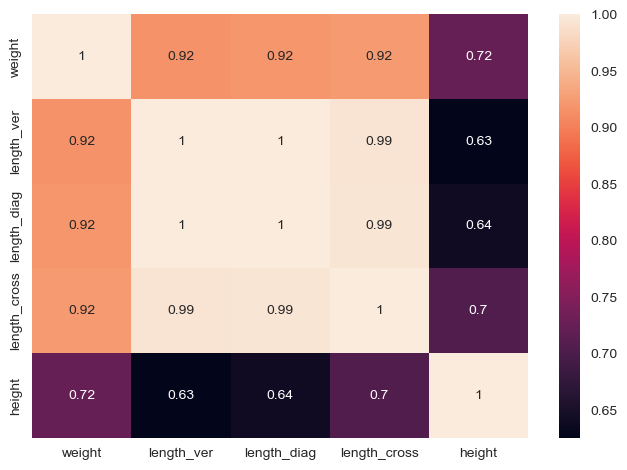

In [29]:
sns.heatmap(df.iloc[:,0:5].corr(), annot = True)

Looks like the vertical length, digonal length and the cross length are almost identical so i will feature engineer a new column called `length` which will be the mean of these 3 columns

In [30]:
df['length'] = (df['length_ver'] + df['length_diag'] + df['length_cross']) / 3

Now let's slice the data into features and target

## Slicing labels

In [31]:
x = df.iloc[:,1:]
y = df.iloc[:,0]
print(f'x shape = {x.shape}')

x shape = (159, 13)


After slicing the data into features and target i will split the data into training and testing sets

## Splitting the data

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

Let's scale the data using the `StandardScaler` from the `sklearn.preprocessing` library

## Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) 

The numerical columns are now scaled

## Modeling

I used the `LinearRegression` model from the `sklearn.linear_model` library to train the model

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

Now let's predict the results

In [35]:
y_pred = lin_reg.predict(x_test)

## Evaluation

I'll use the `mean_squared_error` function from the `sklearn.metrics` library to evaluate the model

Then i'll get the root mean squared error using the `np.sqrt` function

In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root mean squared error = {rmse}')

Root mean squared error = 83.52959560710596
